<ipython-input-2-6a6ceab680b3>:41: RuntimeWarning: invalid value encountered in log
  mfcc = np.log(mfcc)


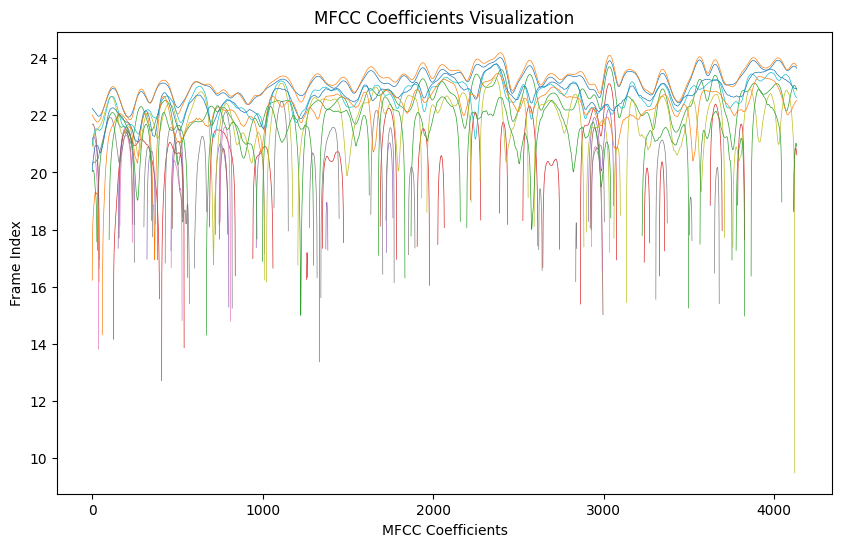

In [ ]:
import numpy as np
import scipy.io.wavfile as wav
from scipy.fftpack import dct
import matplotlib.pyplot as plt

# Load the WAV file
sample_rate, signal = wav.read('audio_1.wav')

# Define the Mel filter bank center frequencies
center_frequencies = 2595 * np.log10(1 + np.arange(40) / 700)

# Create Mel filter banks
filters = np.zeros((26, 400))
for m in range(1, 27):
    f_m_minus = int(center_frequencies[m - 1])
    f_m = int(center_frequencies[m])
    f_m_plus = int(center_frequencies[m + 1])

    for k in range(f_m_minus, f_m):
        filters[m - 1, k] = (k - center_frequencies[m - 1]) / (center_frequencies[m] - center_frequencies[m - 1])
    for k in range(f_m, f_m_plus):
        filters[m - 1, k] = (center_frequencies[m + 1] - k) / (center_frequencies[m + 1] - center_frequencies[m])

# Function to calculate MFCC coefficients
def calculate_mfcc(signal, sample_rate, num_mfcc=13, n_fft=400, hop_length=160):
    # Apply Hamming window to each frame
    frames = np.lib.stride_tricks.as_strided(signal, shape=(len(signal) // hop_length, hop_length), strides=(signal.strides[0], signal.strides[0])).copy()

    windowed_frames = frames * np.hamming(len(frames[0]))

    # Calculate power spectrum
    power_spectrum = np.abs(np.fft.fft(windowed_frames, n_fft))**2

    # Apply Mel filter banks
    filter_banks = np.dot(power_spectrum, filters.T)

    # Discrete Cosine Transform (DCT)
    mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, :num_mfcc]

    # Logarithm of filter banks
    mfcc = np.log(mfcc)

    return mfcc

# Calculate MFCC coefficients
mfcc = calculate_mfcc(signal, sample_rate)

# Visualize the MFCC coefficients
plt.figure(figsize=(10, 6))
plt.plot(mfcc, linewidth=0.5)
plt.xlabel('MFCC Coefficients')
plt.ylabel('Frame Index')
plt.title('MFCC Coefficients Visualization')
plt.show()


In [1]:
import librosa

# Load the audio file
y, sr = librosa.load('audio_1.wav')

# Compute MFCCs
mfcc = librosa.feature.mfcc(y, sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 6))
plt.plot(mfcc)
plt.xlabel('MFCC Coefficients')
plt.ylabel('Frame Index')

# Add a title
plt.title('MFCC Coefficients Visualization')

# Show the plot
plt.show()

<ipython-input-1-b1dc1dbf8709>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load('audio_1.wav')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: ignored